In [1]:
#Primero procedemos a importar las librerias que vamos a usar
#Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest, f_oneway


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# cargamos los csv con los datos de los clientes y de las promociones
df_customer_activity = pd.read_csv("Customer Flight Activity.csv")
df_customer_history = pd.read_csv("Customer Loyalty History.csv")


# Fase 1: Exploracion y limpieza 

 ## 1.1. Exploracion inicial

### 1.1.1. Exploracion CSV Customer Flight Activity

In [3]:
# Primero hacemos una vision general de cada DataFrame
#Customer  Flight Activity
df_customer_activity.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
print(f"El DataFrame Customer Flight Activity tiene {df_customer_activity.shape[0]} filas y {df_customer_activity.shape[1]} columnas.")

El DataFrame Customer Flight Activity tiene 405624 filas y 10 columnas.


In [5]:
df_customer_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


Compruebo que las categorias de las columnas estan bien escritas para sino, darle uniformidad cambiando los valores

In [6]:
# Para ello hacemos un bucle for iterando sobre las columnas mostrando los valores únicos y contandolos

for columna in df_customer_activity.columns:
    print(f"Valores únicos en la columna '{columna}':")
    print(df_customer_activity[columna].value_counts())
    print("\n")

Valores únicos en la columna 'Loyalty Number':
Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64


Valores únicos en la columna 'Year':
Year
2017    202812
2018    202812
Name: count, dtype: int64


Valores únicos en la columna 'Month':
Month
1     33802
9     33802
2     33802
3     33802
11    33802
4     33802
5     33802
7     33802
6     33802
8     33802
10    33802
12    33802
Name: count, dtype: int64


Valores únicos en la columna 'Flights Booked':
Flights Booked
0     197992
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64


Valores únicos en la columna 'Flights with Companions':
Flig

Ahora identifico los nulos del DataFrame

In [7]:
df_customer_activity.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

Miro los estadísticos descriptivos

In [8]:
df_customer_activity.describe().round(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.00,405624.0,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00
mean,550037.87,2017.5,6.50,4.12,1.03,5.15,1208.88,123.69,30.70,2.48
std,258935.29,0.5,3.45,5.23,2.08,6.52,1433.16,146.60,125.49,10.15
min,100018.00,2017.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,326961.00,2017.0,3.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,550834.00,2017.5,6.50,1.00,0.00,1.00,488.00,50.00,0.00,0.00
75%,772194.00,2018.0,9.25,8.00,1.00,10.00,2336.00,239.00,0.00,0.00
max,999986.00,2018.0,12.00,21.00,11.00,32.00,6293.00,676.50,876.00,71.00


### 1.1.2. Exploracion CSV Customer Loyalty History

In [9]:
df_customer_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [10]:
print(f"El DataFrame Customer Loyalty History tiene {df_customer_history.shape[0]} filas y {df_customer_history.shape[1]} columnas.")

El DataFrame Customer Loyalty History tiene 16737 filas y 16 columnas.


In [11]:
df_customer_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

Miro que las columnas tengan sus valores bien escritos y de forma uniforme para sino,limpiar los datos, además aprovecho para saber la cantidad de valores de cada categoria

In [12]:
# Para ello hacemos un bucle for iterando sobre las columnas de tipo object y mostrando los valores únicos y contandolos
for columna in df_customer_history.columns:
    print(f"Valores únicos en la columna '{columna}':")
    print(df_customer_history[columna].value_counts())
    print("\n")

Valores únicos en la columna 'Loyalty Number':
Loyalty Number
480934    1
208485    1
455896    1
469781    1
533488    1
         ..
922188    1
780529    1
721438    1
761015    1
652627    1
Name: count, Length: 16737, dtype: int64


Valores únicos en la columna 'Country':
Country
Canada    16737
Name: count, dtype: int64


Valores únicos en la columna 'Province':
Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64


Valores únicos en la columna 'City':
City
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
Da

Aqui se puede ver que  hay datos de cancelación del programa de puntos desde 2013. Esto puede dar problemas a la hora de comparar y unir datos con del DataFrame anterior  ya que los datos de estos vuelos son de los años 2017 y 2018.

Identificamos los nulos del dataframe

In [13]:
df_customer_history.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

Vamos a mirar el porcentaje de valores nulos de las columnas especificas

In [14]:
(df_customer_history[["Salary","Cancellation Year","Cancellation Month"]].isnull().sum())/(df_customer_history.shape[0])*100

Salary                25.321145
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

En el apartado de limpieza de datos tendremos que ver qué haremos con estos nulos, que tienen un porcentaje bastante significativo. Sin embargo, tampoco estos son extraños pues las columnas de Cancellation Year y Cancellation Month tienen el mismo número de nulos y estos indican que el cliente no ha cancelado su programa de puntos.  
Con respecto a la columna Salary, también es un porcentaje bastante alto, representando un cuarto de la población que no tenemos su salario. Esto es bastante usual con este tipo de datos dado que la gente es bastante reacia a dar su salario.


Vemos los estadisticos descriptivos del dataframe

In [15]:
df_customer_history.describe().round(2)

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.00,12499.00,16737.00,16737.00,16737.00,2067.00,2067.00
mean,549735.88,79245.61,7988.90,2015.25,6.67,2016.50,6.96
std,258912.13,35008.30,6860.98,1.98,3.40,1.38,3.46
min,100018.00,-58486.00,1898.01,2012.00,1.00,2013.00,1.00
25%,326603.00,59246.50,3980.84,2014.00,4.00,2016.00,4.00
50%,550434.00,73455.00,5780.18,2015.00,7.00,2017.00,7.00
75%,772019.00,88517.50,8940.58,2017.00,10.00,2018.00,10.00
max,999986.00,407228.00,83325.38,2018.00,12.00,2018.00,12.00


En este bloque vemos que en la columna Salary hay datos negativos, lo cual no tiene sentido ya que una persona no puede tener un salario negativo.  
También se ve que el año de cancelación empieza en 2013 y el anterior DataFrame de vuelos incluye solo vuelos de 2017 y 2018 por lo que ya vemos que puede no corresponderse a clientes que esten activos.

Ahora vamos a comprobar que no hay valores repetidos en ninguno de los dos DataFrames a través del Loyalty Number para poder hacer la unión correctamente

In [16]:
id_history_unique = set(df_customer_history["Loyalty Number"].unique())

In [17]:
id_activity_unique = set(df_customer_activity["Loyalty Number"].unique())

In [18]:
len(id_activity_unique)

16737

In [19]:
len(id_history_unique)

16737

In [20]:
id_history_unique ^ id_activity_unique

set()

Al no haber valores distintos entre los dos conjuntos de datos procedemos a hacer el merge, asi vemos que no vamos a desechar datos al unirlos.  
Realizamos la union y hacemos una breve exploraciond de los datos

In [21]:
df = pd.merge(df_customer_activity, df_customer_history, on='Loyalty Number')

In [22]:
df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [23]:
print(f"El nuevo DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")


El nuevo DataFrame tiene 405624 filas y 25 columnas.


In [24]:
#Miramos las columnas que han dado como resultado del nuevo dataframe
print(f"Las columnas del nuevo df son: {df.columns.tolist()}\n")

Las columnas del nuevo df son: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']



In [25]:
#Una vez conocemos las columnas vemos la información general de las mismas para ver el tipo, los no null etc
(f'Muesta la informacion del df: {df.info()}\n ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

'Muesta la informacion del df: None\n '

## 1.2. Limpieza de datos

In [26]:
#Revisar que los codigos postales lo se asignan a una ciudad o provincia (groupby ciudad y provincia)

Duplicados

In [27]:
print(f"En el df ya unido hay {df.duplicated().sum()} duplicados")
print(f"En el df de Customer Flight Analysis hay {df_customer_activity.duplicated().sum()} duplicados")
print(f"En el df de Customer Loyalty History hay {df_customer_history.duplicated().sum()} duplicados")

En el df ya unido hay 1864 duplicados
En el df de Customer Flight Analysis hay 1864 duplicados
En el df de Customer Loyalty History hay 0 duplicados


In [28]:
df_customer_activity = df_customer_activity.drop_duplicates(ignore_index=True)

In [29]:
# Eliminamos las filas duplicadas
df = df.drop_duplicates(ignore_index=True)


In [30]:
print(f"En el df ya unido hay {df.duplicated().sum()} duplicados")
print(f"En el df de Customer Flight Analysis hay {df_customer_activity.duplicated().sum()} duplicados")

En el df ya unido hay 0 duplicados
En el df de Customer Flight Analysis hay 0 duplicados


In [31]:
df.describe().round(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,403760.00,403760.0,403760.00,403760.00,403760.00,403760.00,403760.00,403760.00,403760.00,403760.00,301500.00,403760.00,403760.00,403760.00,49650.00,49650.00
mean,549875.38,2017.5,6.50,4.13,1.04,5.17,1214.46,124.26,30.84,2.50,79258.58,7990.86,2015.25,6.67,2016.50,6.96
std,258961.51,0.5,3.45,5.23,2.08,6.53,1434.10,146.70,125.76,10.17,34983.93,6863.32,1.98,3.40,1.38,3.45
min,100018.00,2017.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-58486.00,1898.01,2012.00,1.00,2013.00,1.00
25%,326699.00,2017.0,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,59262.00,3981.78,2014.00,4.00,2016.00,4.00
50%,550598.00,2018.0,7.00,1.00,0.00,1.00,525.00,53.00,0.00,0.00,73479.00,5776.34,2015.00,7.00,2017.00,7.00
75%,772152.00,2018.0,10.00,8.00,1.00,10.00,2342.00,240.00,0.00,0.00,88606.00,8937.12,2017.00,10.00,2018.00,10.00
max,999986.00,2018.0,12.00,21.00,11.00,32.00,6293.00,676.50,876.00,71.00,407228.00,83325.38,2018.00,12.00,2018.00,12.00


Al aparecer unos valores negativos en el mínimo de "Salary" no se si es un error o si es que hay personas morosas por lo que viramos cuántos sale en negativo 

In [32]:
valores_negativos_salary = df['Salary'][df['Salary'] < 0]

In [33]:
valores_negativos_salary

291      -10605.0
956      -58486.0
1716     -31911.0
2081     -49001.0
2433     -46683.0
           ...   
398813   -46303.0
399884   -34079.0
402017   -57297.0
402459   -17534.0
403021   -12497.0
Name: Salary, Length: 480, dtype: float64

In [34]:
print(f" Los valores negativos representan un {round(((len(valores_negativos_salary)/(df_customer_history.shape[0]))*100),2)}% de la columna Salary")

 Los valores negativos representan un 2.87% de la columna Salary


Al haber tan sólo un 2.87% de números negativos, sumado que no tiene sentido que alguien tenga un salario negativo y a que en la próxima fase del ejercicio vamos a calcular el promedio del salario(ejercicio 2.4.) se entiende que estos negativos pueden ser un error externo y se transforman en positivo. 
Para ello se va a usar la funcion .abs() de la libreria pandas que convierte los valores  negativos en positivos

In [35]:
df['Salary'] = df['Salary'].abs()


In [36]:
#Comprobamos que se ha cambiado mirando el salario minimo que ya no debería ser positivo 
print(f'El número menos de la columna salario ahora es {df["Salary"].min()}')

El número menos de la columna salario ahora es 9081.0


Nulos


In [37]:
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')


Como se ha dicho anteriormente, las columnas de Cancellation Year y Cancellation Month se van a dejar los nulos debido a que pueden indicar que son personas que no han cancelado su programa de puntos y sólo se van a tratar la de la columna Salary ya que representa un porcentaje alto y necesitamos esos numeros para luego hacer estimaciones.  
Como los nulos representan un cuarto de la población seleccionada, se va a dejar un DataFrame con nulos y otros sin nulos, para luego poder comparar si nuestra imputación de datos se va a desviar demasiado y tomar decisiones.

In [38]:
#Miramos primero de nuevo una descripcion de todos los datos de salario para hacernos una idea
round(df["Salary"].describe(),2)

count    301500.00
mean      79371.73
std       34726.43
min        9081.00
25%       59262.00
50%       73479.00
75%       88606.00
max      407228.00
Name: Salary, dtype: float64

Al ser "Salary" una cualidad sociodemografica, se compara con otras posibles cualidades sociodemograficas que tenemos dentro de la base de datos y que pueden determinar el salario como es el género, el nivel educativo o el estado civil. Mirando los perfiles que hay la idea es hacer una media de perfiles que puedan ayudarnos a poder imputar los datos con datos poblacionales similares.  

In [39]:
#Para ello hacemos un groupby con salario y los perfiles sociodemograficos ya mencionados
groupby_imputacion = round(df[['Salary','Gender','Education','Marital Status']].groupby(['Gender','Education','Marital Status']).describe(),2)
groupby_imputacion

Salary                       \
                                              count       mean       std   
Gender Education            Marital Status                                 
Female Bachelor             Divorced        19846.0   72498.03  16501.97   
                            Married         86121.0   72994.14  16769.81   
                            Single          21335.0   72045.53  17085.20   
       College              Divorced            0.0        NaN       NaN   
                            Married             0.0        NaN       NaN   
                            Single              0.0        NaN       NaN   
       Doctor               Divorced         2304.0  182508.35  60908.79   
                            Married          5485.0  178367.33  70556.80   
                            Single           1176.0  149117.53  74191.61   
       High School or Below Divorced         1392.0   65601.21  12406.50   
                            Married          6571.0   60823.24  11139.36   
                            Single           1733.0   59303.70  14259.58   
       Master               Divorced         2496.0   99578.36  16028.49   
                            Married          2520.0  104444.90  18387.68   
                            Single           1416.0  104412.73  19883.85   
Male   Bachelor             Divorced        19824.0   72327.30  16654.53   
                            Married         85385.0   72601.42  16652.47   
                            Single          20056.0   71850.20  15956.59   
       College              Divorced            0.0        NaN       NaN   
                            Married             0.0        NaN       NaN   
                            Single              0.0        NaN       NaN   
       Doctor               Divorced         2040.0  184905.61  68995.30   
                            Married          5689.0  183683.31  71100.65   
                            Single           1037.0  160932.97  72469.62   
       High School or Below Divorced         1629.0   60925.26  11822.45   
                            Married          5934.0   61654.03  11534.48   
                            Single           1656.0   59010.75  14117.98   
       Master               Divorced         2123.0  101887.28  14701.04   
                            Married          2515.0  107898.99  17035.83   
                            Single           1217.0  104614.87  18877.82   

                                                                         \
                                                min       25%       50%   
Gender Education            Marital Status                                
Female Bachelor             Divorced        15609.0   59429.0   72378.0   
                            Married          9081.0   58900.0   72817.0   
                            Single          16743.0   57546.0   70152.0   
       College              Divorced            NaN       NaN       NaN   
                            Married             NaN       NaN       NaN   
                            Single              NaN       NaN       NaN   
       Doctor               Divorced        67411.0  131981.0  191662.0   
                            Married         48210.0  123495.0  170041.0   
                            Single          50363.0   89057.0  135971.0   
       High School or Below Divorced        36588.0   54522.0   67718.0   
                            Married         39079.0   52717.0   61040.0   
                            Single          21853.0   45229.0   60370.0   
       Master               Divorced        56414.0   85959.0  102782.0   
                            Married         70615.0   89964.0  106899.0   
                            Single          72027.0   81333.0  114551.0   
Male   Bachelor             Divorced        17682.0   59410.0   70321.0   
                            Married         10605.0   58505.0   72409.0   
                            Single  

Observamos que en todos los perfiles de las personas que su nivel de estudios es "College" esta en nulo, lo que nos hace sospechar y miramos más especificamente el perfil de salario por nivel de estudios

In [40]:
groupby_education = round(df[['Salary','Education']].groupby(['Education']).describe(),2)
groupby_education

Salary                                          \
                         count       mean       std      min       25%   
Education                                                                
Bachelor              252567.0   72599.08  16667.68   9081.0   58711.0   
College                    0.0        NaN       NaN      NaN       NaN   
Doctor                 17731.0  178403.68  70380.05  48109.0  124407.0   
High School or Below   18915.0   61146.38  12105.35  21853.0   52054.0   
Master                 12287.0  103734.52  17518.49  56414.0   88120.0   

                                                    
                           50%       75%       max  
Education                                           
Bachelor               71972.0   85866.0  105563.0  
College                    NaN       NaN       NaN  
Doctor                180440.0  236612.0  407228.0  
High School or Below   61806.0   71344.0   93875.0  
Master                105487.0  118530.0  133080.0

Parece que todos los valroes de la categoria College son nulos y su suma da cero, por lo que nos hace sospechas que todos los nulos de Salary corresponden a un unico perfil

In [41]:
#Vemos todos los nulos que hay en salario
nulos_salary = df["Salary"].isnull().sum()
nulos_salary

102260

In [42]:
# Mostrar solo la columna 'Education' filtrada por 'College'
nulos_salary_collage = df[df['Education'] == 'College'][["Salary"]].isnull().sum()
nulos_salary_collage


Salary    102260
dtype: int64

In [43]:
print(f"El total de nulos de Salary menos el total de nulos de Salary en Collage es {nulos_salary-nulos_salary_collage}")

El total de nulos de Salary menos el total de nulos de Salary en Collage es Salary    0
dtype: int64


Con esto vemos que por alguna razón, sólo las personas cuyo nivel educativo es Collage no tiene rellenada la casilla de salario. Esto puede ser bastante sospechoso ya que todas las personas de un mismo grupo de estudios no hayan querido dar sus datos de salario y el resto de los grupos todo el mundo si rompe la hipotesis de que hay gente que no ha querido contestar. Esto parece un error en la propia recogida de datos, quizas que si alguien estudiaba "College" luego saltaba la pregunta del salario.  
En cualquier caso, al suponer que es el 25% de los datos, si sustituimos por un 0 puede desviar muchisimo cualquier calculo estadístico con salario, por lo que se desecha esa idea. 
Se ha decidido dejar los nulos. Por un lado , en la cancelacion en mes y año porque se interpreta que los clientes que tienen nulos es porque no han cancelado y además no se nos ha pedido la interpretación de dichos datos. En segundo lugar, también se va a conservar los nulos de salario. Al ser un porcentaje tan alto, con una cantidad tan grande de datos hacer cualquier imputación podrían alterar mucho la media, moda, etc. Además, se nos pide unicamente el salario con el nivel de estudios. En este caso, se omitirá las personas que han estudiao en "Collage".

# Fase 2: Visualización

## 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Para incluir las categorias de vuelos reservados y  mes del año, entendiendo que no importa el año sino el mes en si, se hará un groupby con estas dos categorias sumando todos los vuelos

In [44]:
monthly_flights = df.groupby('Month')['Flights Booked'].sum().reset_index()



Tras probar diferentes tipos de gráficas, se ve mejor la Barplot para leer los datos. Además se sustituye el número de los meses que esta representado en la columna Month por el nombre de los meses para que el gráfico se más comprensible

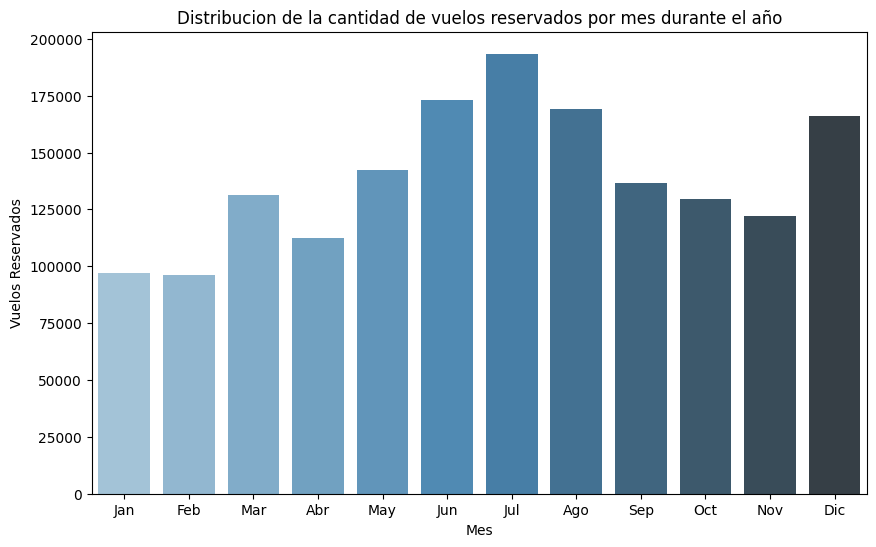

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', 
            y='Flights Booked', 
            data=monthly_flights, 
            palette='Blues_d')
plt.title('Distribucion de la cantidad de vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']) 
plt.show()


Se puede observar que en los meses de verano (de junio a septiembre) hay más vuelos coincidiendo ocn las vacaciones estivales y luego vuelve a ver un repunte en diciembre, posiblemente con motivo de la navidad, también temporada alta de turismo y viajes familiares.

## 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


Primero se revisan un poco los datos de las dos columnas que necesitamos para seleccionarel gráfico 

In [46]:
df["Points Accumulated"].describe()

count    403760.000000
mean        124.263761
std         146.696179
min           0.000000
25%           0.000000
50%          53.000000
75%         240.000000
max         676.500000
Name: Points Accumulated, dtype: float64

In [47]:
df['Loyalty Card'].value_counts()

Loyalty Card
Star      183745
Nova      136883
Aurora     83132
Name: count, dtype: int64

Se crea una nueva columan llamada Distanceper Points para ver la representacion de la misma en la grafica y hacerla más legible

In [48]:
df["Distance per Points"] = (df['Distance']/df['Points Accumulated']).round(0)

Para visualizar la relación entre dos columnas se usa el tipo de gráfico Scaterplot.

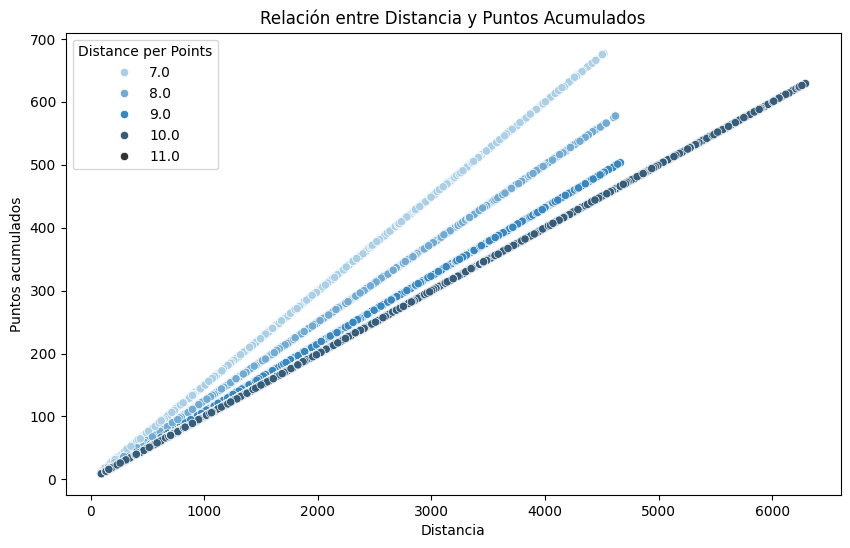

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', 
                y='Points Accumulated', 
                data=df, 
                hue='Distance per Points', 
                palette = "Blues_d")
plt.title('Relación entre Distancia y Puntos Acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')
plt.show()

In [50]:
correlation = df['Distance'].corr(df['Points Accumulated'])
print(f'Coeficiente de correlación: {correlation}')


Coeficiente de correlación: 0.9945458005650538


En la gráfica se ve que a cuanta más distancia recorrida, más puntos acumulados,por lo que se puede determinar que hay una relación entre estos. Además se ha calculado la correlación  y es del 0.9945458005650538, muy próximo a 1 por lo que hay una alta correlación entre ambos datos.

## 3. ¿Cuál es la distribución de los clientes por provincia o estado?

Se vuelve a elegir el tipo de gráfico Barplot para ver la distribucion en este caso de las diferentes provincias y se coge el "Loyalty Number" que corresponde al ID de cada persona agrupandolo por provincias

In [51]:

distribucion_clientes = df.groupby("Province")["Loyalty Number"].count().reset_index()


In [52]:
distribucion_clientes

,Province,Loyalty Number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


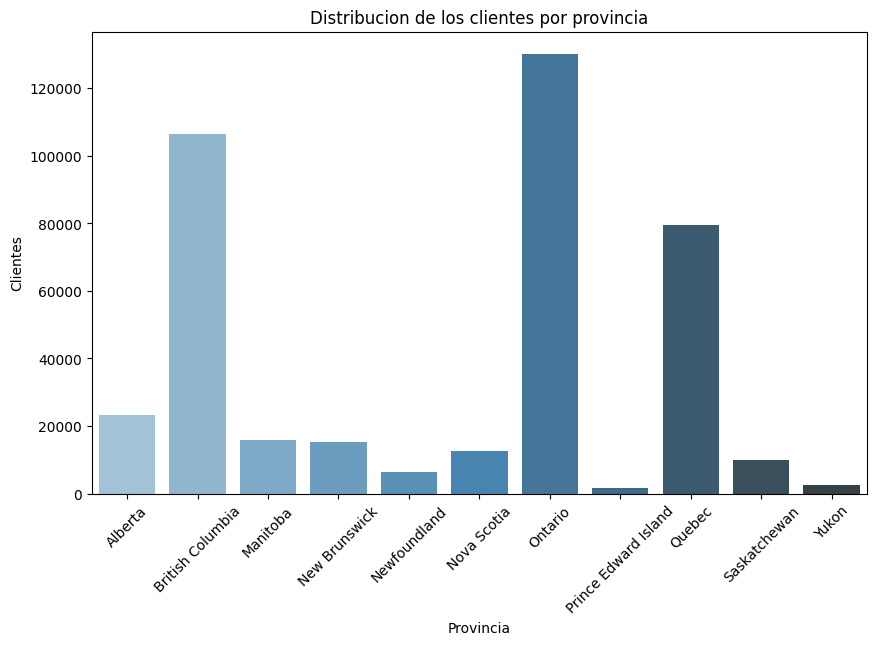

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Loyalty Number', data=distribucion_clientes, palette='Blues_d')
plt.title('Distribucion de los clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Clientes')
plt.xticks(rotation=45)
plt.show()


Se puede ver que principalmente hay más cliente en Onterio, seguido de British columbia y Quebec. Esto se puede ser a que en esas pronvincias hay más o mayores aeropuertos o que opere la aerolinea en los mismos con más vuelos que en las otras ciudades.

## 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Para comprar datos se va a usar el tipo de gráfica Bar Plot.  
Además, sabemos que al cruzar salario y educación, la categoría College  esta completa de nulos, por lo que se va a decidir eliminarla en este caso y recordar el error a la hora de recoger el dato de College. Se podría mantener en la gráfica pero sin ella queda más limpia.

In [54]:
salario_promedio_estudio =df[["Education","Salary"]].groupby("Education")['Salary'].mean().reset_index()

In [55]:
salario_promedio_estudio = salario_promedio_estudio.round(2)

In [56]:
salario_promedio_estudio['dummy_education'] = salario_promedio_estudio['Education'].map({'High School or Below':1,'College':2,'Bachelor':3,'Master':4,'Doctor':5})
salario_promedio_estudio = salario_promedio_estudio.sort_values('dummy_education')

In [57]:
df_na = salario_promedio_estudio.dropna()

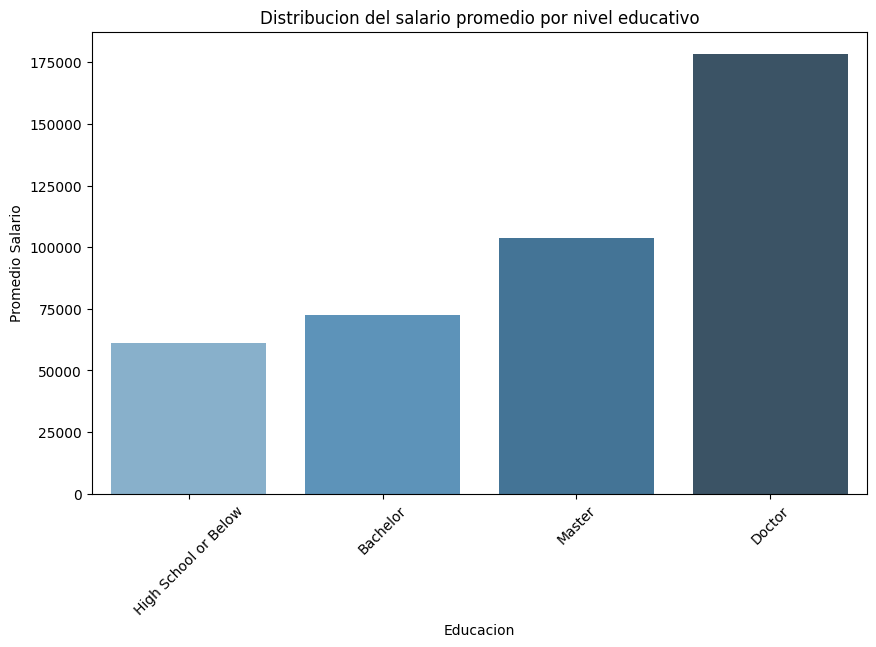

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', 
            y='Salary', 
            data=df_na, 
            palette='Blues_d')
plt.title('Distribucion del salario promedio por nivel educativo')
plt.xlabel('Educacion')
plt.ylabel('Promedio Salario')
plt.xticks(rotation=45) 
plt.show()

Se puede observar que a mayor nivel de estudios, mayor es el salario de los clientes. Esto indica en los datos estan bien recogidos y tienen lógica indicando la tendencia social que hay con la relacion salario y estudios

## 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Para ver la proporción se va a usar un grafico Pie y transformando los datos a porcentajes para una mejor comprensión de los mismos.

In [59]:
tipo_tarjeta = df[["Loyalty Number","Loyalty Card"]].groupby(["Loyalty Card"]).count()

In [60]:
tipo_tarjeta

,Loyalty Number
Loyalty Card,
Aurora,83132
Nova,136883
Star,183745


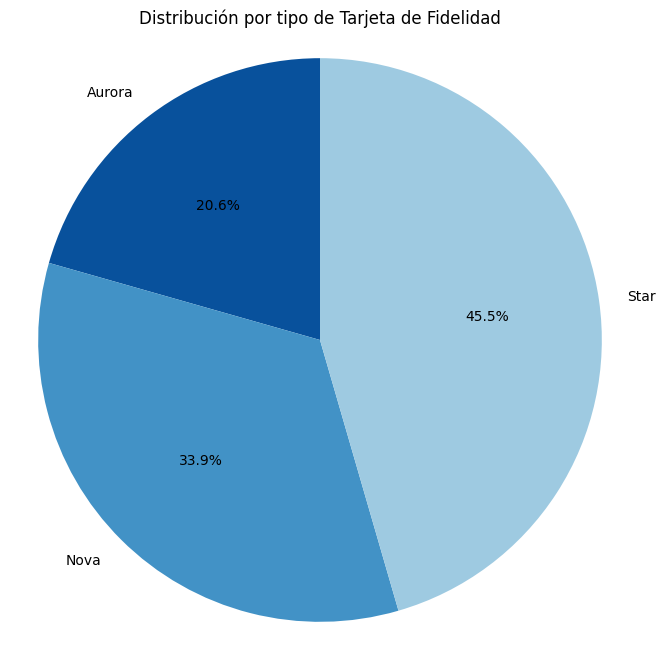

In [61]:
plt.figure(figsize=(8, 8))
labels = tipo_tarjeta.index
sizes = tipo_tarjeta['Loyalty Number'] 
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors = ['#08519c','#4292c6','#9ecae1'] )
plt.title('Distribución por tipo de Tarjeta de Fidelidad')

plt.axis('equal') 
plt.show()

Se puede ver que la tarjeta más popular es la Star, seguida con un tercio de la población que indica que es la Nova la que usa y por último la menos usada e sla Aurora

## 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

Es necesario agrupar los clientes por las caractrísticas solicitadas a través de un group by

In [62]:
genero_estadocivil =df[['Loyalty Number','Gender','Marital Status']].groupby(['Gender','Marital Status']).count()

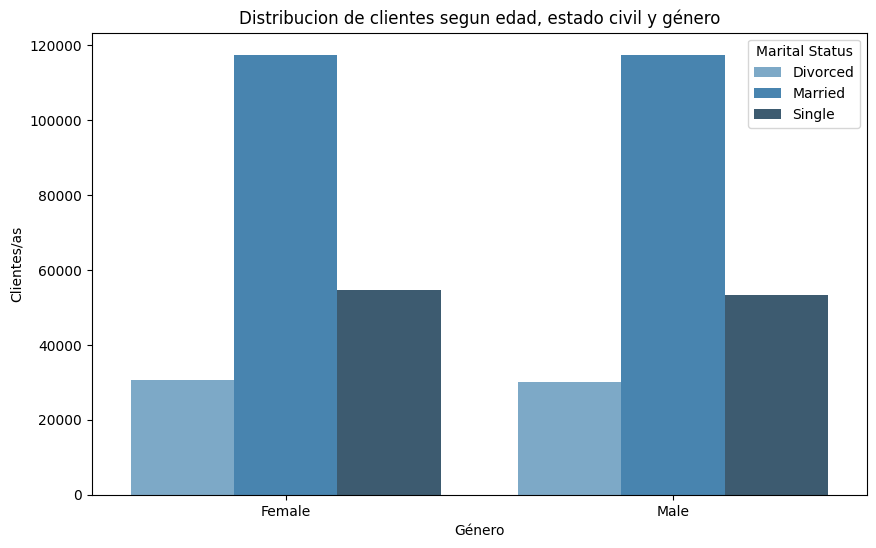

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', 
            y='Loyalty Number', 
            hue='Marital Status', 
            data=genero_estadocivil, 
            palette='Blues_d')

plt.title('Distribucion de clientes segun edad, estado civil y género')
plt.xlabel('Género')
plt.ylabel('Clientes/as')
plt.show()


Se ve que no hay diferencias dentro de la cuestión de género con respecto al estado civil de hombre y mujeres. Lo que si se aprecia es la tendencia al estado civil "Married"  principalmente, seguido de  la población soltera y en tercer lugar la divorciada

# BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

## 1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.

In [64]:
df_filtrado = df[['Flights Booked','Education']]

In [65]:
df_filtrado

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
...,...,...
403755,0,College
403756,0,Doctor
403757,3,Bachelor
403758,0,College


## 2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivasbásicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.

In [66]:
df_descriptivo = df_filtrado.groupby("Education")["Flights Booked"].agg(mean_flights='mean',
    median_flights = 'median',
    moda_flights = pd.Series.mode,
    varianza_flights = 'var',
    std_flights='std',
    count_flights='count',
    min_flights='min',
    max_flights='max')

In [67]:
df_descriptivo

,mean_flights,median_flights,moda_flights,varianza_flights,std_flights,count_flights,min_flights,max_flights
Education,,,,,,,,
Bachelor,4.110288,1.0,0,27.265843,5.221671,252567,0,21
College,4.169744,1.0,0,27.520938,5.246040,102260,0,21
Doctor,4.175512,1.0,0,27.635748,5.256971,17731,0,21
High School or Below,4.176209,1.0,0,27.449915,5.239267,18915,0,21
Master,4.200700,1.0,0,27.185339,5.213956,12287,0,21


## 3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles educativos.

   **Hipótesis sobre los vuelos en función de la educación:**
   - Hipótesis nula (H0): No hay diferencia en los vuelos entre las personas diferentes niveles.
   - Hipótesis alternativa (H1): Hay una diferencia significativa en los vuelos entre los diferentes niveles de estudio.
   - Prueba de hipótesis: Se podría realizar una prueba t de Student para comparar los ingresos promedio de estos dos grupos.

Para poder hacer la comparacion con varios grupos, en este caso los 5 niveles educativos, se va a usar el test ANOVA para  determinar si existe diferencia estadisticas significativas entre estos grupos. En el caso de que el  resultado de pvale < 0,05  significa que se rechaza la HO.

In [68]:

highschool = df_filtrado[df_filtrado['Education'] == 'High School or Below']["Flights Booked"]
college = df_filtrado[df_filtrado['Education'] == 'College']["Flights Booked"]
bachelor = df_filtrado[df_filtrado['Education'] == 'Bachelor']["Flights Booked"]
master = df_filtrado[df_filtrado['Education'] == 'Master']["Flights Booked"]
doctor = df_filtrado[df_filtrado['Education'] == 'Doctor']["Flights Booked"]

In [69]:
stats.f_oneway(highschool, college, bachelor, master, doctor)

F_onewayResult(statistic=3.57895773849834, pvalue=0.006352981736019541)

El pvalue < 0,05 por lo que se rechaza la Hipotesis 0 o nula. Esto quiere decir que al menos uno de los grupos educativos tiene un promedio de vuelos reservados significativamente diferente al del resto.

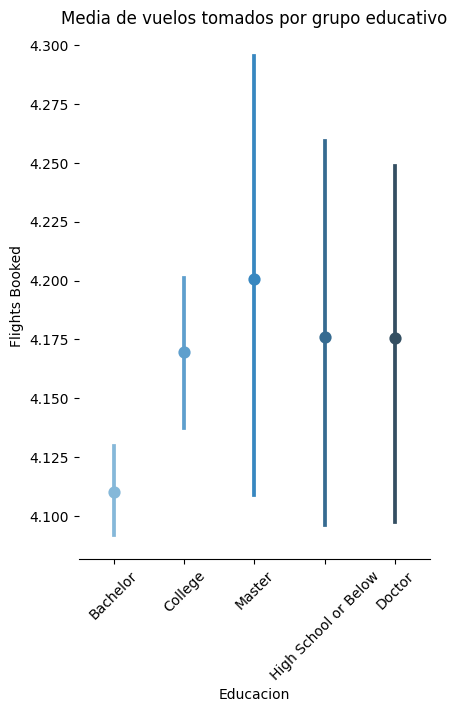

In [70]:
g = sns.catplot(data= df_filtrado, 
                x="Education",
                y='Flights Booked',
                palette= 'Blues_d',
                kind='point',
                height=6,
                aspect=.75)
g.despine(left=True)
plt.title('Media de vuelos tomados por grupo educativo')
plt.xlabel('Educacion')
plt.ylabel('Flights Booked')
plt.xticks(rotation=45) 
plt.show()


Con el grafico se ve quela desviación que anula la H0 es el grupo de Bachelor